In [23]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications import VGG16
from keras.utils.vis_utils import plot_model

In [9]:
# dimensions of our images.
img_width, img_height = 224, 224
channels = 3
batch_size = 40
n_train_samples = 5120
n_val_samples = 1280
epochs = 100

train_data_dir = '/content/drive/MyDrive/NN_project/data_00/train'
validation_data_dir = '/content/drive/MyDrive/NN_project/data_00/validation'

In [10]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

val_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [11]:
pretrained_model = VGG16(input_shape=(img_height, img_width, channels), include_top=False, weights="imagenet")

58892288/58889256 [==============================] - 1s 0us/step


In [13]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

for idx,layer in enumerate(pretrained_model.layers):
    layer.trainable = False

In [14]:
x = Flatten()(last_output)

x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [19]:
model = Model(pretrained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=n_val_samples//batch_size,
    steps_per_epoch=n_train_samples//batch_size)

Epoch 1/100
128/128 [==============================] - 34s 196ms/step - loss: 4.9121 - accuracy: 0.4983 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/100
128/128 [==============================] - 25s 195ms/step - loss: 0.7079 - accuracy: 0.5462 - val_loss: 0.6831 - val_accuracy: 0.6352
Epoch 3/100
128/128 [==============================] - 25s 195ms/step - loss: 0.6957 - accuracy: 0.5850 - val_loss: 0.6572 - val_accuracy: 0.6898
Epoch 4/100
128/128 [==============================] - 25s 196ms/step - loss: 0.6766 - accuracy: 0.6245 - val_loss: 0.6299 - val_accuracy: 0.6555
Epoch 5/100
128/128 [==============================] - 25s 196ms/step - loss: 0.6544 - accuracy: 0.6283 - val_loss: 0.7194 - val_accuracy: 0.5133
Epoch 6/100
128/128 [==============================] - 25s 197ms/step - loss: 0.6178 - accuracy: 0.6763 - val_loss: 0.6037 - val_accuracy: 0.6445
Epoch 7/100
128/128 [==============================] - 25s 197ms/step - loss: 0.6399 - accuracy: 0.6838 - val_loss: 0.5869 -

In [21]:
def plot_metrics(history):
  # plotting the metrics
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

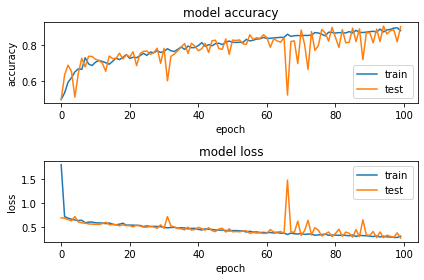

In [24]:
plot_metrics(history)

In [26]:
loss_and_metrics = model.evaluate(val_generator, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

32/32 - 5s - loss: 0.2652 - accuracy: 0.9023
Test Loss 0.2651588022708893
Test Accuracy 0.90234375
